In [81]:
# Importing required libraries
from sklearn.svm import SVR
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('WIKI-FB.csv')
prix_actuel =  df.tail(1)
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2017-10-27,174.15,178.210,173.90,177.88,29867490.0,0.0,1.0,174.15,178.210,173.90,177.88,29867490.0
1,2017-10-26,171.38,172.285,170.39,170.63,10932929.0,0.0,1.0,171.38,172.285,170.39,170.63,10932929.0
2,2017-10-25,171.90,172.250,168.89,170.60,15095603.0,0.0,1.0,171.90,172.250,168.89,170.60,15095603.0
3,2017-10-24,172.30,173.240,171.50,171.80,11629341.0,0.0,1.0,172.30,173.240,171.50,171.80,11629341.0
4,2017-10-23,175.20,175.340,171.25,171.27,13622072.0,0.0,1.0,175.20,175.340,171.25,171.27,13622072.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,2012-05-25,32.90,32.950,31.11,31.91,37149800.0,0.0,1.0,32.90,32.950,31.11,31.91,37149800.0
1366,2012-05-24,32.95,33.210,31.77,33.03,50237200.0,0.0,1.0,32.95,33.210,31.77,33.03,50237200.0
1367,2012-05-23,31.37,32.500,31.36,32.00,73600000.0,0.0,1.0,31.37,32.500,31.36,32.00,73600000.0
1368,2012-05-22,32.61,33.590,30.94,31.00,101786600.0,0.0,1.0,32.61,33.590,30.94,31.00,101786600.0


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1371 non-null   object 
 1   Open         1371 non-null   float64
 2   High         1371 non-null   float64
 3   Low          1371 non-null   float64
 4   Close        1371 non-null   float64
 5   Volume       1371 non-null   float64
 6   Ex-Dividend  1371 non-null   float64
 7   Split Ratio  1371 non-null   float64
 8   Adj. Open    1371 non-null   float64
 9   Adj. High    1371 non-null   float64
 10  Adj. Low     1371 non-null   float64
 11  Adj. Close   1371 non-null   float64
 12  Adj. Volume  1371 non-null   float64
dtypes: float64(12), object(1)
memory usage: 139.4+ KB


In [84]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

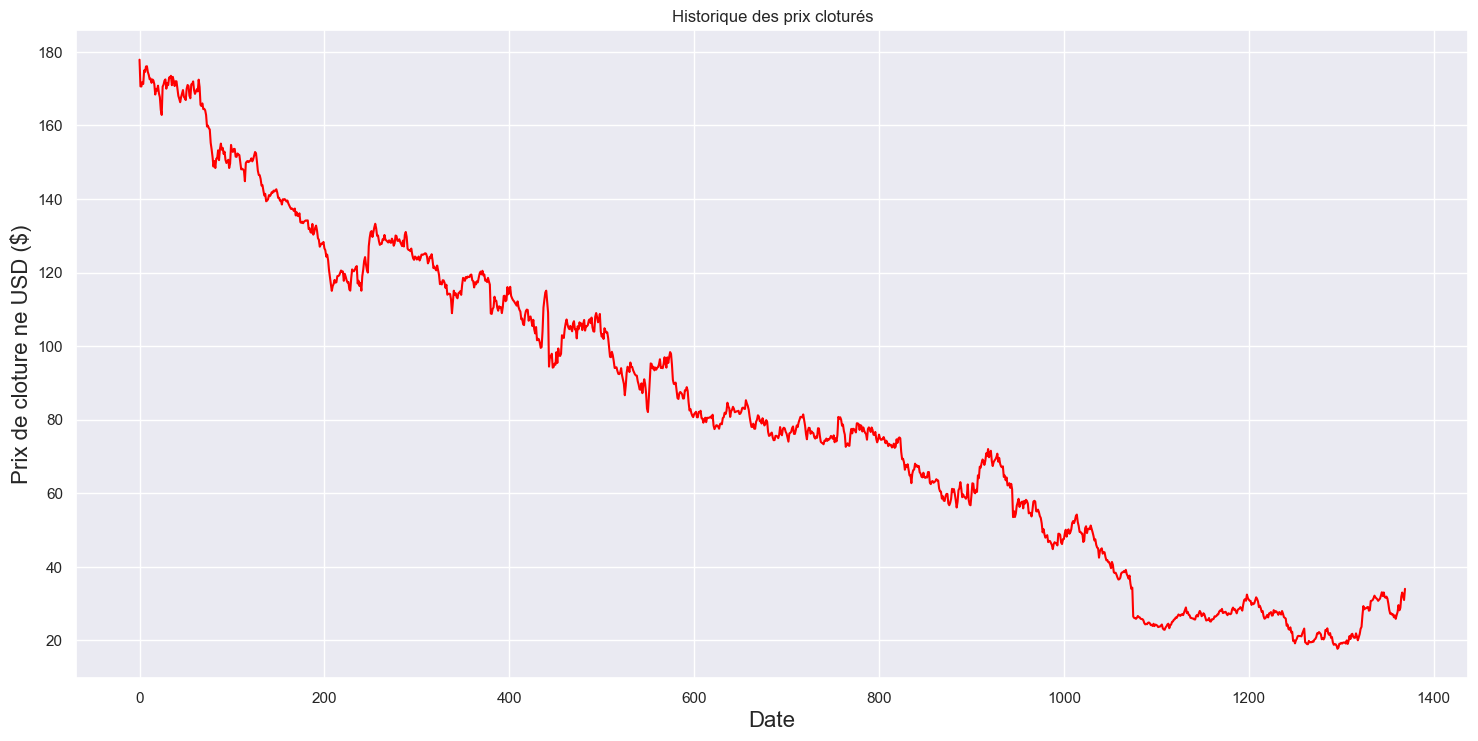

In [85]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Historique des prix cloturés')
plt.plot(df['Close'],color='red')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Prix de cloture ne USD ($)',fontsize=16)
plt.show()

In [86]:
#  part of dataset will be used for training and testing
df = df[1350:1368]
df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
1350,2012-06-18,29.955,32.08,29.410,31.410,42978900.0,0.0,1.0,29.955,32.08,29.410,31.410,42978900.0
1351,2012-06-15,28.505,30.10,28.350,30.014,43563800.0,0.0,1.0,28.505,30.10,28.350,30.014,43563800.0
1352,2012-06-14,27.650,28.32,27.380,28.290,16855000.0,0.0,1.0,27.650,28.32,27.380,28.290,16855000.0
1353,2012-06-13,27.660,28.10,27.100,27.270,17102800.0,0.0,1.0,27.660,28.10,27.100,27.270,17102800.0
1354,2012-06-12,27.480,27.77,26.960,27.400,15816800.0,0.0,1.0,27.480,27.77,26.960,27.400,15816800.0
1355,2012-06-11,27.180,28.07,26.835,27.005,28219600.0,0.0,1.0,27.180,28.07,26.835,27.005,28219600.0
1356,2012-06-08,26.550,27.76,26.440,27.100,38034000.0,0.0,1.0,26.550,27.76,26.440,27.100,38034000.0
1357,2012-06-07,27.000,27.35,26.150,26.310,26159500.0,0.0,1.0,27.000,27.35,26.150,26.310,26159500.0
1358,2012-06-06,26.070,27.17,25.520,26.810,61489200.0,0.0,1.0,26.070,27.17,25.520,26.810,61489200.0
1359,2012-06-05,26.700,27.76,25.750,25.869,42473400.0,0.0,1.0,26.700,27.76,25.750,25.869,42473400.0


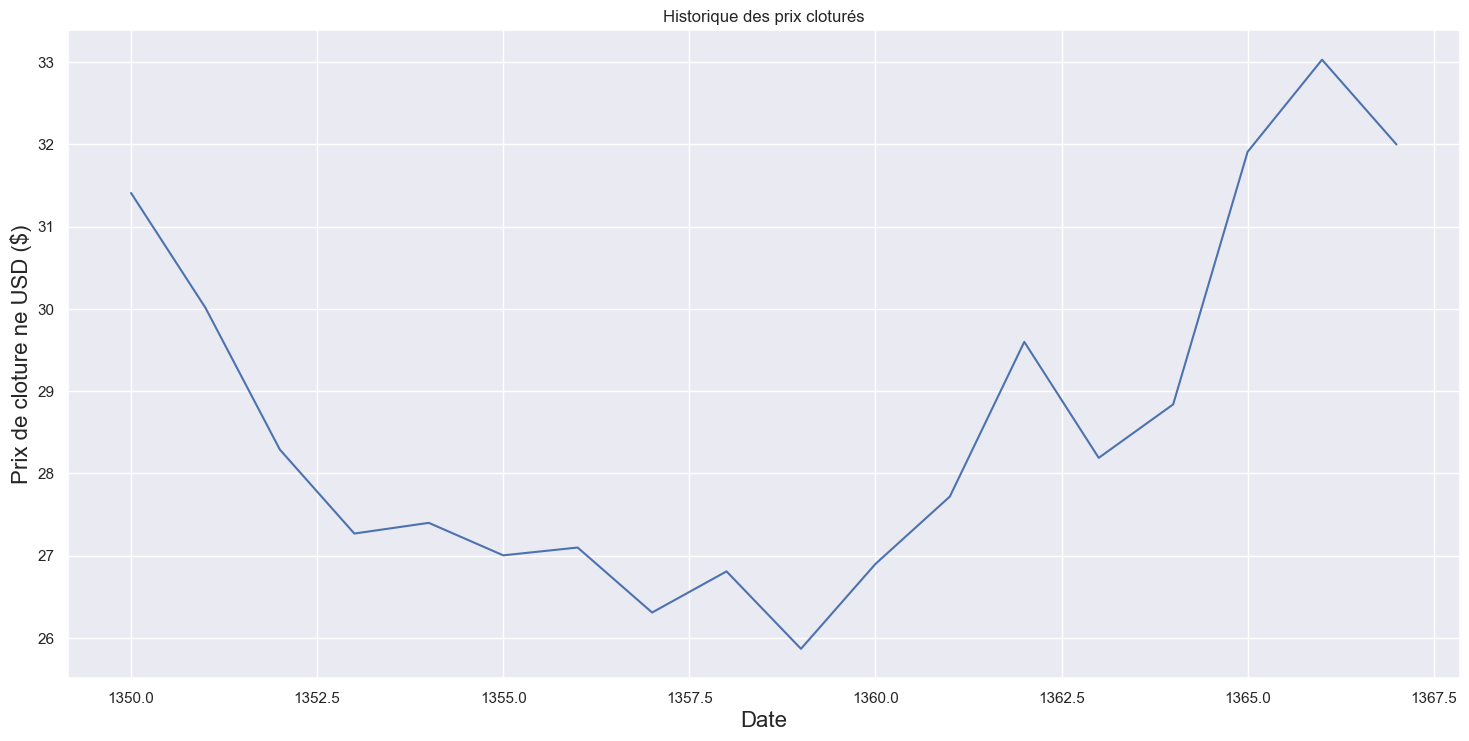

In [87]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Historique des prix cloturés')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=16)
plt.ylabel('Prix de cloture ne USD ($)',fontsize=16)
plt.show()

In [88]:
# création d'une liste vide pour les données dépendantes et indépendantes 
days = list() 
adj_close_prices =  list()

# obtenir les dates et les prix de clôture ajustés (adj_close_prices)
df_days = df.loc[:,'Date']
df_adj_close = df.loc[:,'Adj. Close']

In [89]:
#days creation
def date_to_timestamp(d): 
    return  pd.to_datetime(d,format='%Y-%m-%d').timestamp()

In [90]:
# création des données indépendantes 
for day in df_days: 
    # pour extraire les jours à partir des dates
    days.append([int(day.split('-')[2])]) 
    
# Création de dataset dépendante
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

In [91]:
# créer les 3 modèles SVR (SVM regresseur)

# créer et trainer un modèle svr en uilisant un kernel linéaire 
lin_svr = SVR(kernel='linear', C=100.0)
lin_svr.fit(days, adj_close_prices)



SVR(C=100.0, kernel='linear')

In [92]:
# créer et trainer un modèle svr en uilisant un kernel polinomial 
pol_svr = SVR(kernel='poly', C=100.0, degree=2)
pol_svr.fit(days, adj_close_prices)



SVR(C=100.0, degree=2, kernel='poly')

In [93]:
# créer et trainer un modèle svr en uilisant un kernel rbf  
rbf_svr = SVR(kernel='rbf', C=100.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=100.0, gamma=0.15)

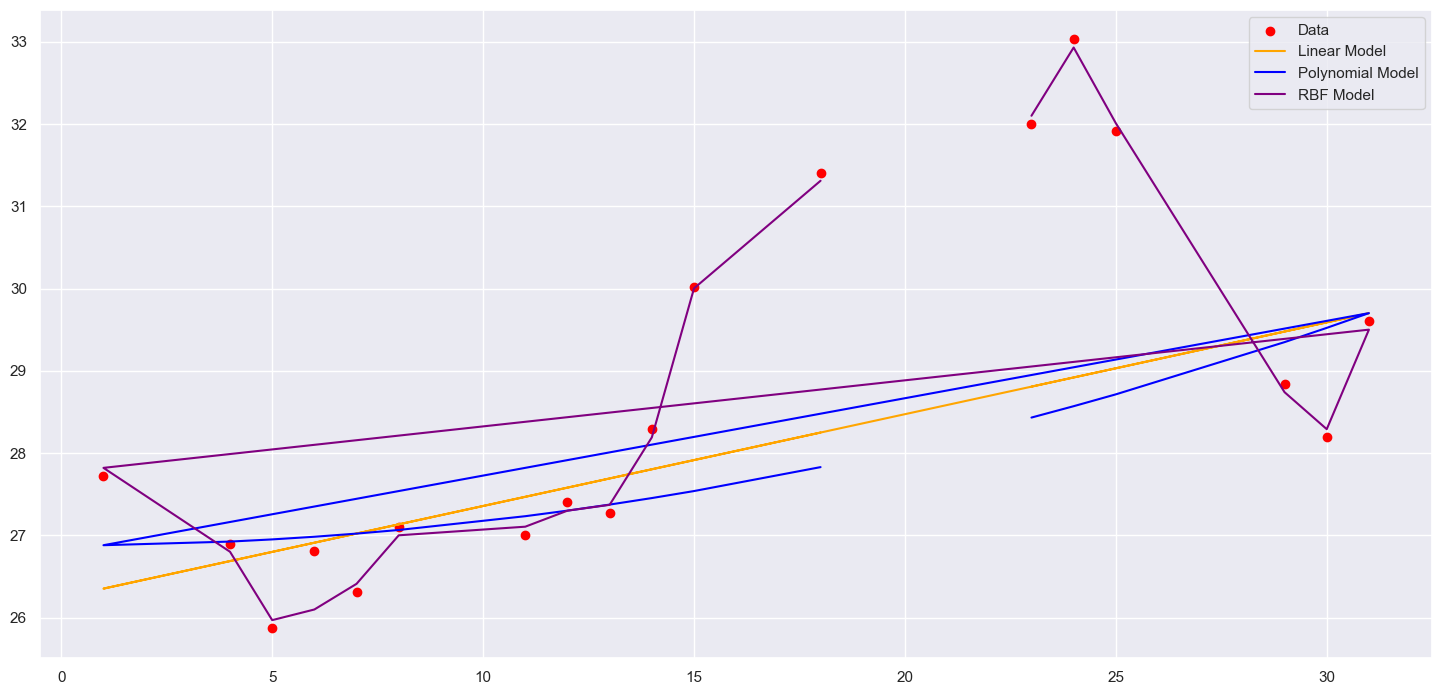

In [94]:
# plotter les modèles en un graph pour savoir qui a le meilleur entrainement pour la donnée originale 
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color='red', label='Data')
plt.plot(days, lin_svr.predict(days), color='orange', label='Linear Model')
plt.plot(days, pol_svr.predict(days), color='blue', label='Polynomial Model')
plt.plot(days, rbf_svr.predict(days), color='purple', label='RBF Model')
plt.legend()
plt.show()

In [95]:
# prediction of price for one day
day =[[19]]
print('Prédiction avec un SVR Linéaire :', lin_svr.predict(day) )
print('Prédiction avec un SVR Polynomial :', pol_svr.predict(day) )
print('Prédiction avec un SVR RBF :', rbf_svr.predict(day) )

Prédiction avec un SVR Linéaire : [28.3608]
Prédiction avec un SVR Polynomial : [27.93766507]
Prédiction avec un SVR RBF : [30.46550332]


In [96]:
# Calcul d'erreur

from sklearn.model_selection import train_test_split
# Split data
X = days
y = df_adj_close
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_pred = rbf_svr.predict(X_test)
y_pred

array([27.00004689, 27.3704563 , 28.29024571, 28.19036534, 28.73968456])

In [97]:
import math  
from sklearn.metrics import mean_squared_error

In [98]:
print(math.sqrt(mean_squared_error(y_test, y_pred)/100))

0.010012147416398665
